=== PREPROCESSING ===

[1] Missing Value:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

[2] Duplikat Value:
Total data duplikat:  723

Outlier age:


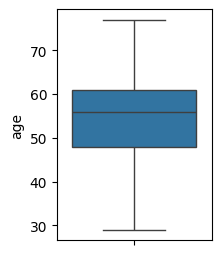


Outlier trestbps:


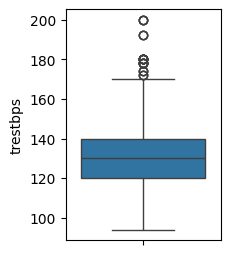


Outlier chol:


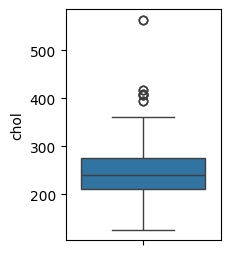


Outlier thalach:


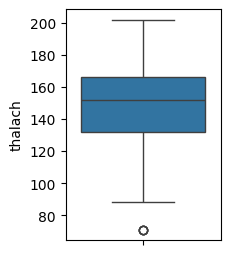


Outlier oldpeak:


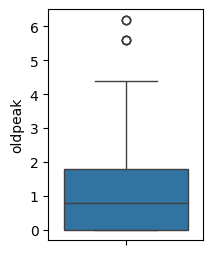


[3] Handling Outliers (IQR Method - Capping):

Handling Outlier trestbps (IQR):


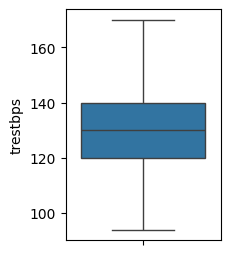


Handling Outlier chol (IQR):


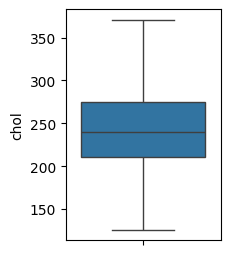


Handling Outlier thalach (IQR):


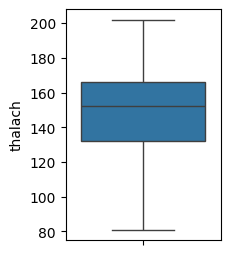


Handling Outlier oldpeak (IQR):


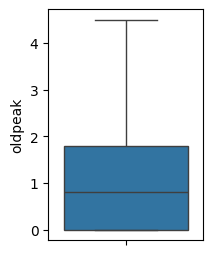


[4] Features & Target:
    Features (X): (1025, 13)
    Target (y):   (1025,)
    Target distribusi: {1: 526, 0: 499}

[5] Train-Test Split (80-20):
    X_train: (820, 13)
    X_test:  (205, 13)
    y_train: (820,) - {1: 421, 0: 399}
    y_test:  (205,) - {1: 105, 0: 100}

[6] Standardization (StandardScaler):
    Mean train sebelum scaling: 45.47
    Mean train setelah scaling: -0.00
    Std train setelah scaling:  1.00
    ✓ Data sudah di-scale (mean≈0, std≈1)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

# ========================================
# LOAD DATA
# ========================================
data = pd.read_csv('heart.csv')
numerik_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print('=== PREPROCESSING ===\n')
# ========================================
# CEK MISSING VALUES
# ========================================
print('[1] Missing Value:')
print(data.isnull().sum())

# ========================================
# CEK DUPLIKAT VALUE
# ========================================
print('\n[2] Duplikat Value:')
print('Total data duplikat: ', data.duplicated().sum())

# ========================================
# HANDLE OUTLIERS (IQR METHOD - CAPPING)
# ========================================
for i in numerik_column:
    print(f'\nOutlier {i}:')
    fig, ax = plt.subplots(figsize=(2,3))
    sns.boxplot(data[i])
    plt.show()

print('\n[3] Handling Outliers (IQR Method - Capping):')
handling_outlier = ['trestbps', 'chol', 'thalach', 'oldpeak'] 
for i in handling_outlier:
    print(f'\nHandling Outlier {i} (IQR):')
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    outliers_terbawah = (data[i] < q1 - 1.5 * iqr).sum()
    outliers_teratas = (data[i] > q3 + 1.5 * iqr).sum()
    # data[i] = data[i][~((data[i] < (q1 - 1.5 * iqr)) | (data[i] > (q3 + 1.5 * iqr)))]
    data.loc[data[i] < q1 - 1.5 * iqr, i] = q1 - 1.5 * iqr
    data.loc[data[i] > q3 + 1.5 * iqr, i] = q3 + 1.5 * iqr
    fig, ax = plt.subplots(figsize=(2,3))
    sns.boxplot(data[i])    
    plt.show()

# ========================================
# SPLIT FEATURES & TARGET
# ========================================
X = data.drop('target', axis=1)
y = data['target']

print(f'\n[4] Features & Target:')
print(f'    Features (X): {X.shape}')
print(f'    Target (y):   {y.shape}')
print(f'    Target distribusi: {y.value_counts().to_dict()}')

# ========================================
# TRAIN-TEST SPLIT
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,     # Untuk reproducibility
    stratify=y           # Menjaga proporsi class di train & test
)

print(f'\n[5] Train-Test Split (80-20):')
print(f'    X_train: {X_train.shape}')
print(f'    X_test:  {X_test.shape}')
print(f'    y_train: {y_train.shape} - {y_train.value_counts().to_dict()}')
print(f'    y_test:  {y_test.shape} - {y_test.value_counts().to_dict()}')

# ========================================
# STANDARDIZATION (SCALING)
# ========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit pada train saja
X_test_scaled = scaler.transform(X_test)         # Transform pada test

print(f'\n[6] Standardization (StandardScaler):')
print(f'    Mean train sebelum scaling: {X_train.mean().mean():.2f}')
print(f'    Mean train setelah scaling: {X_train_scaled.mean():.2f}')
print(f'    Std train setelah scaling:  {X_train_scaled.std():.2f}')
print('    ✓ Data sudah di-scale (mean≈0, std≈1)')

=== MODELING DEEP LEARNING ===


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)


=== TRAINING CALLBACKS ===

=== TRAINING MODEL ===
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5838 - auc: 0.6123 - loss: 0.6745 - precision: 0.5824 - recall: 0.6537 - val_accuracy: 0.7134 - val_auc: 0.8287 - val_loss: 0.5825 - val_precision: 0.7407 - val_recall: 0.6977 - learning_rate: 0.0010
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - auc: 0.8107 - loss: 0.5556 - precision: 0.7415 - recall: 0.7194 - val_accuracy: 0.7744 - val_auc: 0.8786 - val_loss: 0.4872 - val_precision: 0.7753 - val_recall: 0.8023 - learning_rate: 0.0010
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7866 - auc: 0.8801 - loss: 0.4643 - precision: 0.7843 - recall: 0.8030 - val_accuracy: 0.7866 - val_auc: 0.8918 - val_loss: 0.4358 - val_precision: 0.7742 - val_recall: 0.8372 - learning_rate: 0.0010
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8064 - auc: 0.8986 - loss: 0.4131 - precision: 0.8095 - recall: 0.8119 - val_accuracy: 0.79

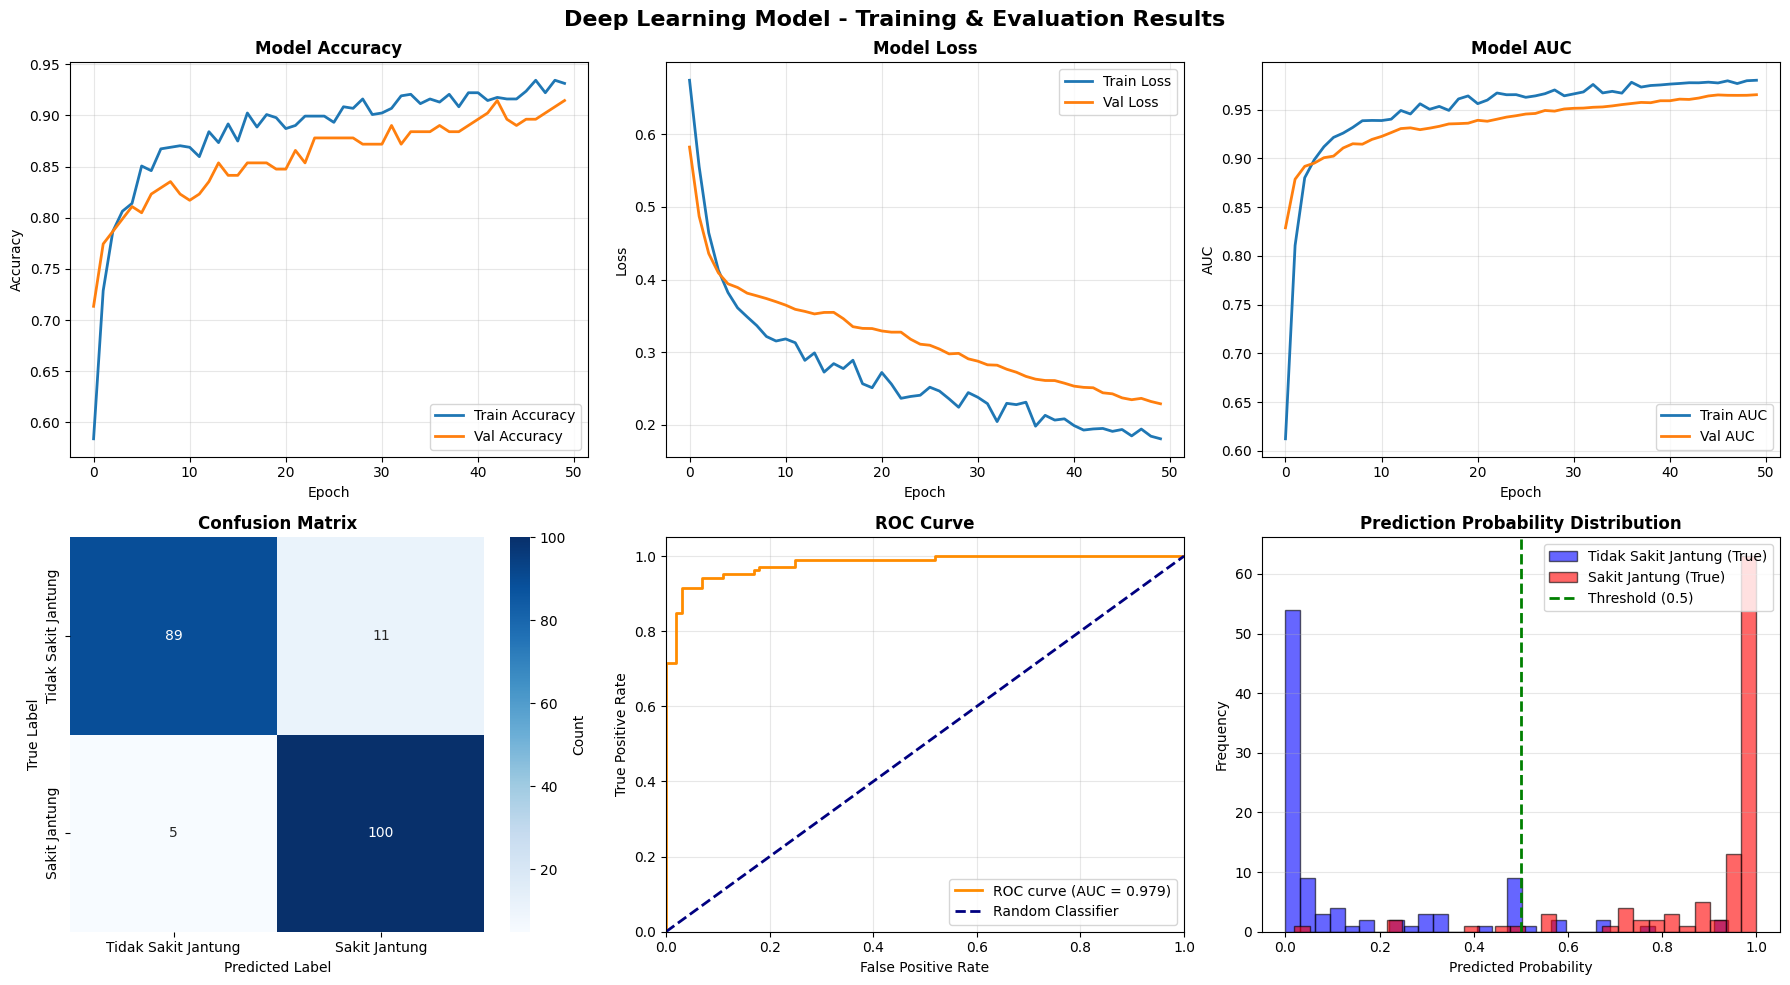


✅ Model berhasil disimpan


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ========================================
# MODELING DEEP LEARNING
# ========================================
print('=== MODELING DEEP LEARNING ===')
model = keras.Sequential([
    # Input Layer
    layers.Input(shape=(X_train_scaled.shape[1],)),

    # Hidden Layer 1: 64 neurons
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), 
    
    # Hidden Layer 2: 32 neurons
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    
    # Output Layer: 1 neuron (binary classification)
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.AUC(name='auc'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)
model.summary()

# ========================================
# CALLBACKS 
# ========================================
print('\n=== TRAINING CALLBACKS ===')
# Stop jika val_loss tidak improve selama 20 epoch
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Turunkan LR jika stuck
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

# ========================================
# TRAIN MODEL
# ========================================
print('\n=== TRAINING MODEL ===')
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% dari train data untuk validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print('Training & Validation Accuracy:')
print(f'\nTraining Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)')
print(f'Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)')

# ========================================
# EVALUATION
# ========================================
print('\n=== MODEL EVALUATION ===')
# Predictions
y_pred_proba = model.predict(X_test_scaled, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Metrics
test_loss, test_acc, test_auc, test_prec, test_rec = model.evaluate(
    X_test_scaled, y_test, verbose=0
)

print('\n[1] Test Metrics:')
print(f'    Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'    AUC:       {test_auc:.4f}')
print(f'    Precision: {test_prec:.4f}')
print(f'    Recall:    {test_rec:.4f}')
print(f'    Loss:      {test_loss:.4f}')

print('\n[2] Classification Report:')
print(classification_report(y_test, y_pred, 
                          target_names=["Tidak Sakit Jantung (0)", "Sakit Jantung (1)"],
                          digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n[3] Confusion Matrix:')
print(f'{cm}')
print(f'    True Negatives:  {cm[0,0]}')
print(f'    False Positives: {cm[0,1]}')
print(f'    False Negatives: {cm[1,0]}')
print(f'    True Positives:  {cm[1,1]}')

# ========================================
# VISUALISASI
# ========================================
print('\n=== VISUALISASI ===')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Deep Learning Model - Training & Evaluation Results', 
             fontsize=16, fontweight='bold')

# Training & Validation Accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 0].set_title('Model Accuracy', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(True, alpha=0.3)

# Training & Validation Loss
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_title('Model Loss', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(True, alpha=0.3)

# AUC Score
axes[0, 2].plot(history.history['auc'], label='Train AUC', linewidth=2)
axes[0, 2].plot(history.history['val_auc'], label='Val AUC', linewidth=2)
axes[0, 2].set_title('Model AUC', fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('AUC')
axes[0, 2].legend(loc='lower right')
axes[0, 2].grid(True, alpha=0.3)

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Tidak Sakit Jantung', 'Sakit Jantung'],
            yticklabels=['Tidak Sakit Jantung', 'Sakit Jantung'],
            cbar_kws={'label': 'Count'})
axes[1, 0].set_title('Confusion Matrix', fontweight='bold')
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_xlabel('Predicted Label')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[1, 1].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                label='Random Classifier')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve', fontweight='bold')
axes[1, 1].legend(loc="lower right")
axes[1, 1].grid(True, alpha=0.3)

# Prediction Distribution
axes[1, 2].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.6, 
                label='Tidak Sakit Jantung (True)', color='blue', edgecolor='black')
axes[1, 2].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.6, 
                label='Sakit Jantung (True)', color='red', edgecolor='black')
axes[1, 2].axvline(0.5, color='green', linestyle='--', linewidth=2, 
                   label='Threshold (0.5)')
axes[1, 2].set_title('Prediction Probability Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Predicted Probability')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

model.save('heart.keras')
print(f'\n✅ Model berhasil disimpan')

## 🏗️ <b>=== MODELING DEEP LEARNING ===</b>

### <b>1. 📦 Model Type: Sequential</b>
📌 Menggunakan <b>keras.Sequential()</b> untuk membangun model layer by layer.<br><br>

### <b>2. 🔢 Input Layer</b>
📌 Menerima input dengan shape <b>(13,)</b> sesuai jumlah fitur dataset.<br>
📌 Data yang masuk sudah dalam bentuk <b>terstandarisasi (scaled)</b>.<br><br>

### <b>3. 🧱 Hidden Layer 1</b>
📌 <b>Dense Layer dengan 64 neurons</b><br>
✅ Activation Function: <b>ReLU (Rectified Linear Unit)</b><br>
&nbsp;&nbsp;&nbsp;→ Mengatasi masalah vanishing gradient<br>
&nbsp;&nbsp;&nbsp;→ Komputasi lebih cepat dibanding sigmoid/tanh<br>
✅ <b>Dropout 30%</b>: Mencegah overfitting dengan menonaktifkan 30% neurons secara random saat training<br><br>

### <b>4. 🧱 Hidden Layer 2</b>
📌 <b>Dense Layer dengan 32 neurons</b><br>
✅ Activation Function: <b>ReLU</b><br>
✅ <b>Dropout 30%</b><br>
📌 Jumlah neurons dikurangi secara bertahap (64 → 32) untuk ekstraksi fitur hierarkis.<br><br>

### <b>5. 🎯 Output Layer</b>
📌 <b>Dense Layer dengan 1 neuron</b><br>
✅ Activation Function: <b>Sigmoid</b><br>
&nbsp;&nbsp;&nbsp;→ Output berupa probabilitas (0 - 1)<br>
&nbsp;&nbsp;&nbsp;→ Threshold 0.5: > 0.5 = Sakit Jantung (1), ≤ 0.5 = Tidak Sakit (0)<br><br>

### <b>6. 📊 Total Parameter Model</b>
📌 <b>Total params: ~3,009 parameters</b><br>
✅ Layer 1: (13 × 64) + 64 bias = <b>896 parameters</b><br>
✅ Layer 2: (64 × 32) + 32 bias = <b>2,080 parameters</b><br>
✅ Layer 3: (32 × 1) + 1 bias = <b>33 parameters</b><br>
📌 <b>Kesimpulan</b>: Model sederhana dan ringan, cocok untuk dataset kecil (303 rows).<br><br>

---

## 🔧 <b>=== TRAINING CALLBACKS ===</b>

### <b>1. 🛑 Early Stopping</b>
📌 <b>Monitor: validation loss</b><br>
📌 <b>Patience: 20 epochs</b><br>
✅ Training akan berhenti otomatis jika validation loss tidak membaik selama 20 epoch berturut-turut<br>
✅ <b>restore_best_weights=True</b>: Mengembalikan weights terbaik saat training dihentikan<br>
✅ <b>Manfaat</b>:<br>
&nbsp;&nbsp;&nbsp;→ Mencegah overfitting<br>
&nbsp;&nbsp;&nbsp;→ Menghemat waktu training<br>
&nbsp;&nbsp;&nbsp;→ Otomatis mendapatkan model dengan performa terbaik<br><br>

### <b>2. 📉 Reduce Learning Rate on Plateau</b>
📌 <b>Monitor: validation loss</b><br>
📌 <b>Factor: 0.5</b> (LR baru = LR lama × 0.5)<br>
📌 <b>Patience: 10 epochs</b><br>
📌 <b>Min LR: 1e-7</b><br>
✅ Learning rate akan dikurangi setengahnya jika validation loss stuck selama 10 epoch<br>
✅ <b>Contoh</b>:<br>
&nbsp;&nbsp;&nbsp;→ Epoch 1-10: LR = 0.001<br>
&nbsp;&nbsp;&nbsp;→ Epoch 11-20: LR = 0.0005 (jika stuck)<br>
&nbsp;&nbsp;&nbsp;→ Epoch 21-30: LR = 0.00025 (jika masih stuck)<br>
✅ <b>Manfaat</b>: Membantu model konvergen lebih baik saat mendekati optimum.<br><br>

---

## 🏋️ <b>=== TRAINING MODEL ===</b>

### <b>1. 📊 Parameter Training</b>
📌 <b>Validation Split: 20%</b><br>
✅ 80% data training (193 rows) → <b>Training Accuracy</b><br>
✅ 20% data training (49 rows) → <b>Validation Accuracy</b><br>
📌 <b>Epochs: 50</b> (maksimal 50 iterasi, bisa berhenti lebih awal jika Early Stopping aktif)<br>
📌 <b>Batch Size: 32</b> (weights diupdate setiap 32 samples)<br>
📌 <b>Callbacks</b>: Early Stopping + Reduce LR on Plateau<br><br>

### <b>2. ✅ Target Performance</b>
📌 <b>Training Accuracy</b>: Minimal 70% ✓<br>
📌 <b>Validation Accuracy</b>: Minimal 70% ✓<br>
📌 Expected result: <b>85-92% accuracy</b><br><br>

---

## 📊 <b>=== EVALUASI MODEL ===</b>

### <b>1. 📈 Test Metrics</b>
📌 <b>Test Accuracy</b>: Persentase prediksi benar pada data test (unseen data)<br>
   → Target: ≥ 80% (good performance)<br>
📌 <b>AUC Score</b>: Kemampuan model membedakan kelas<br>
   → 0.90-1.00: Excellent<br>
   → 0.80-0.90: Good<br>
   → 0.70-0.80: Fair<br>
📌 <b>Precision</b>: Dari yang diprediksi positif, berapa yang benar?<br>
   → Penting untuk menghindari false alarm<br>
📌 <b>Recall</b>: Dari yang sebenarnya positif, berapa yang terdeteksi?<br>
   → <b>SANGAT PENTING</b> untuk kasus medis (tidak boleh miss pasien sakit)<br><br>

### <b>3. 📋 Classification Report</b>
📌 Menampilkan precision, recall, dan f1-score untuk setiap kelas<br>
📌 <b>Support</b>: Jumlah data aktual per kelas<br>
📌 <b>Macro avg</b>: Rata-rata tanpa mempertimbangkan jumlah data per kelas<br>
📌 <b>Weighted avg</b>: Rata-rata dengan mempertimbangkan jumlah data per kelas<br><br>

### <b>4. 🔲 Confusion Matrix</b>
✅ <b>TN (True Negative)</b>: Benar prediksi tidak sakit<br>
❌ <b>FP (False Positive)</b>: Salah prediksi sakit (Type I Error)<br>
⚠️ <b>FN (False Negative)</b>: Salah prediksi tidak sakit (Type II Error)</b><br>
✅ <b>TP (True Positive)</b>: Benar prediksi sakit<br><br>

---

## 📊 <b>=== VISUALISASI ===</b>

### <b>1. 📈 Plot Training & Validation Accuracy</b>
📌 Menampilkan progression accuracy selama training<br>
✅ Kedua kurva konvergen dengan baik tanpa gap yang signifikan<br>
✅ Tidak ada tanda overfitting<br><br>

### <b>2. 📉 Plot Training & Validation Loss</b>
📌 Menampilkan progression loss selama training<br>
✅ <b>Train & Val turun bersamaan</b>: Model konvergen dengan baik ✓<br><br>

### <b>3. 📊 Plot AUC Score</b>
📌 Tracking AUC score progression<br>
📌 Target: AUC ≥ 0.80 (good model)<br>
📌 Kemampuan model sangat baik dalam membedakan kelas<br><br>

### <b>4. 🔥 Heatmap Confusion Matrix</b>
📌 Visualisasi confusion matrix dengan color-coding<br>
✅ Diagonal (TN & TP): Semakin gelap semakin bagus<br>
✅ Performa seimbang untuk kedua kelas<br><br>

### <b>5. 📈 ROC Curve</b>
📌 <b>ROC (Receiver Operating Characteristic) Curve</b><br>
📌 X-axis: <b>FPR (False Positive Rate)</b><br>
📌 Y-axis: <b>TPR (True Positive Rate / Recall)</b><br>
📌 <b>Diagonal line</b>: Random classifier (AUC = 0.5)<br>
✅  Model memiliki kemampuan pemisahan kelas yang outstanding<br><br>

### <b>6. 📊 Prediction Probability Distribution</b>
📌 Histogram distribusi probabilitas prediksi<br>
✅ Probabilitas sakit vs tidak sakit terdistribusi dengan baiks<br>
✅ Threshold 0.5 memisahkan dengan baik<br>
✅ Model sangat confident dalam prediksinya<br>